## This code calculates frequency of steps during the running(or walking) from the 3-axis accelerometer data.
### Algorithm includes folowing parts:
### 1) Calculate full acceleration
### 2)Calculate difference between full acceleration and acceleration of z axis
### 3)Apply Fourier transform to calculated signal

In [49]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

measurements_per_second = 50 #frequency of accelerometer measurements
data = np.load("accelerometer_running_data.npy")
acc_x = data[::3]
acc_y = data[1::3]
acc_z = data[2::3]

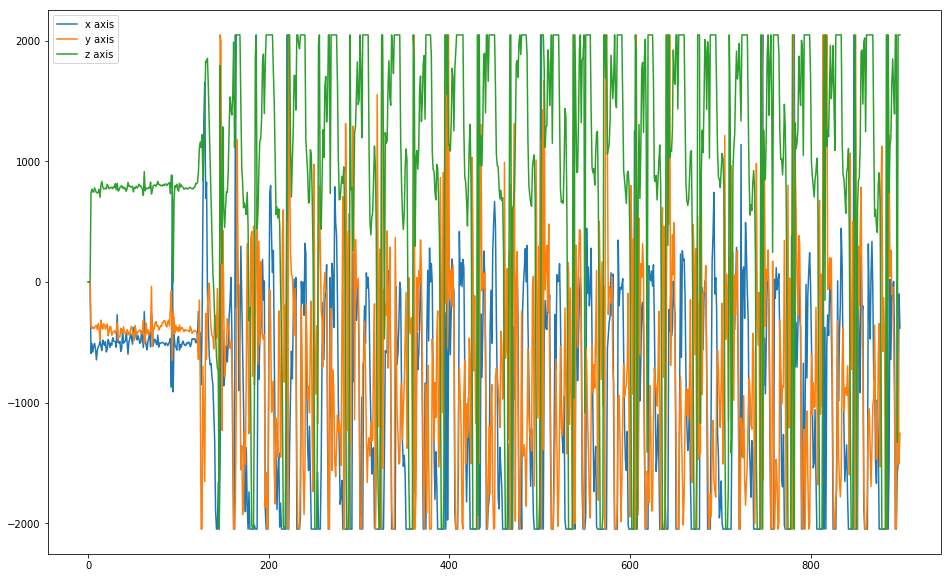

In [50]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.plot(acc_x)
plt.plot(acc_y)
plt.plot(acc_z)
plt.legend(labels = ["x axis","y axis","z axis"])
plt.show()

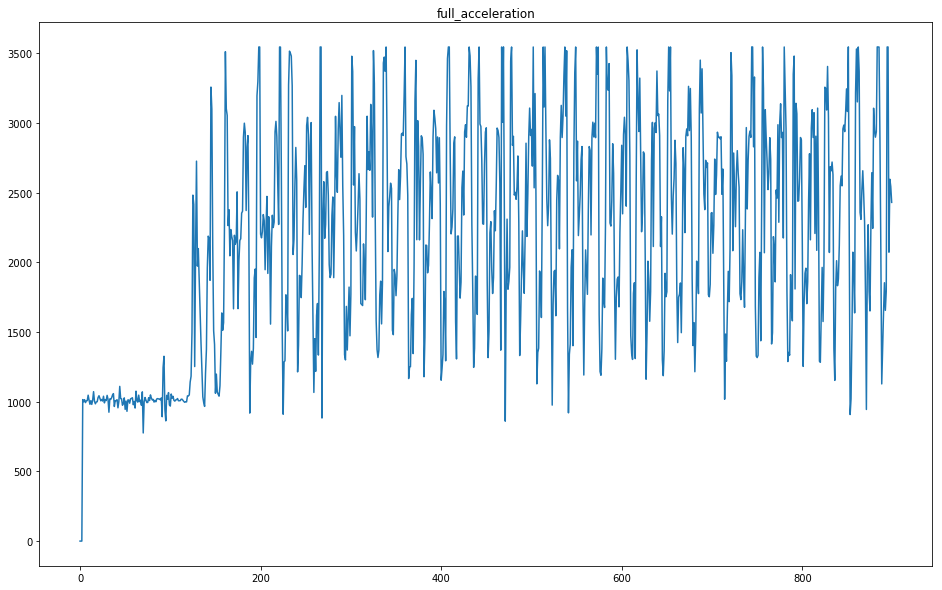

In [51]:
#Calculating of full aceleration
acc_full = np.sqrt(np.square(acc_x) + np.square(acc_y) + np.square(acc_z)) 
plt.title("full_acceleration")
plt.plot(acc_full)
plt.show()

(900,)


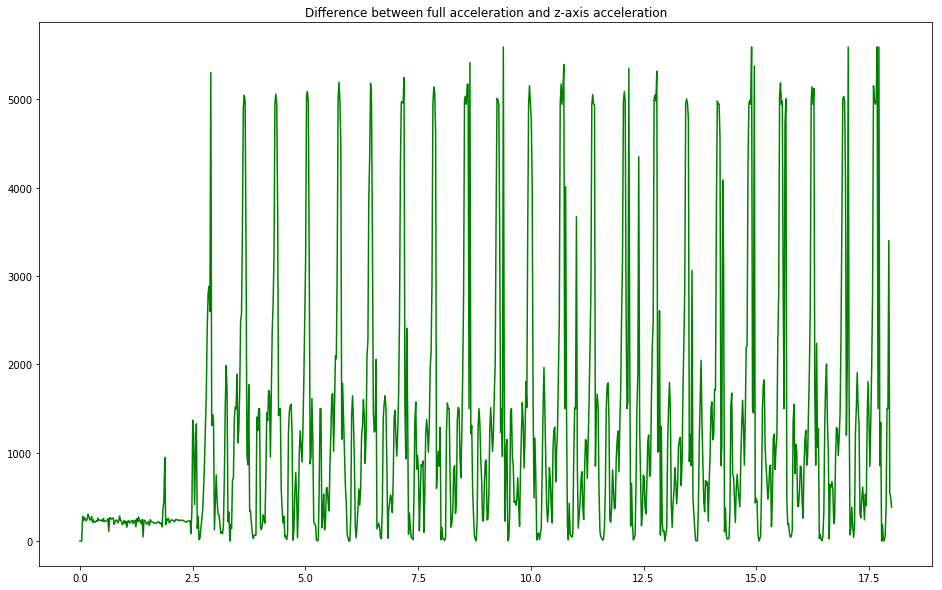

In [52]:
#Calculating of difference between full aceleration and z-axis acceleration
diff_z_and_full = np.asarray(abs(acc_z - acc_full))
diff_z_and_full = diff_z_and_full
print(diff_z_and_full.shape)

t = np.linspace(0, diff_z_and_full.size/measurements_per_second, diff_z_and_full.size)
plt.title("Difference between full acceleration and z-axis acceleration")
plt.plot(t,diff_z_and_full,c="green")
plt.show()

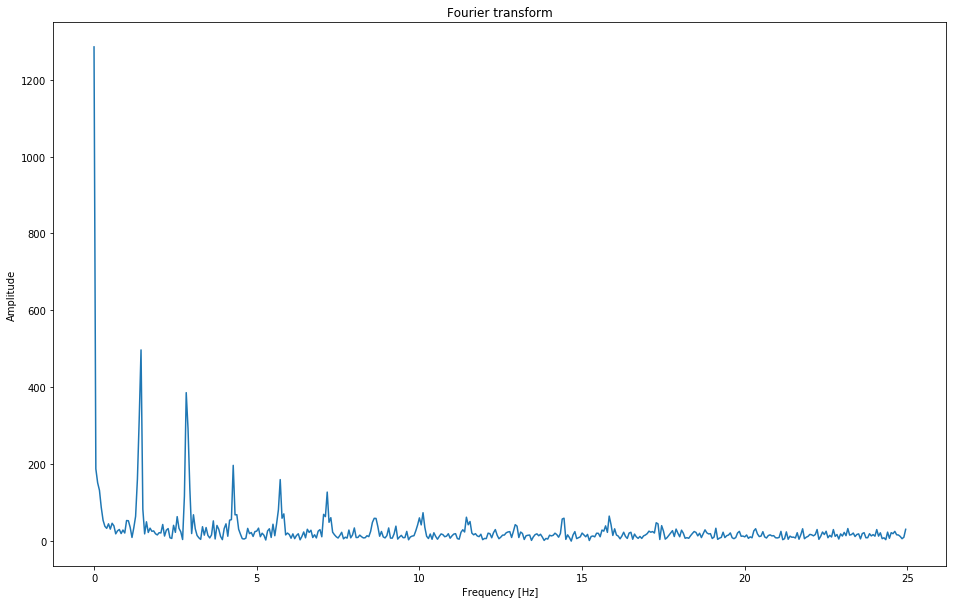

2.833333333333333
1.4444444444444444
0.0


In [53]:
#Applying Fourier transform
fft = fft(diff_z_and_full)
T = t[1] - t[0]  # sampling interval 
N = diff_z_and_full.size
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
amp = f[:N // 2]
freq = np.abs(fft)[:N // 2] * 1 / N
plt.plot(amp, freq)  
plt.title("Fourier transform")
plt.show()

#Chosing needed frequency. Note, there are 2 frequency - first is the frequency of one foot,
#second is frequency of 2 feet together, we take the second one
max_3_idxs = np.argpartition(freq, -3)[-3:]
print(amp[max_3_idxs[0]])
print(amp[max_3_idxs[1]])
print(amp[max_3_idxs[2]])
step_frequency = amp[max_3_idxs[0]]

    

17


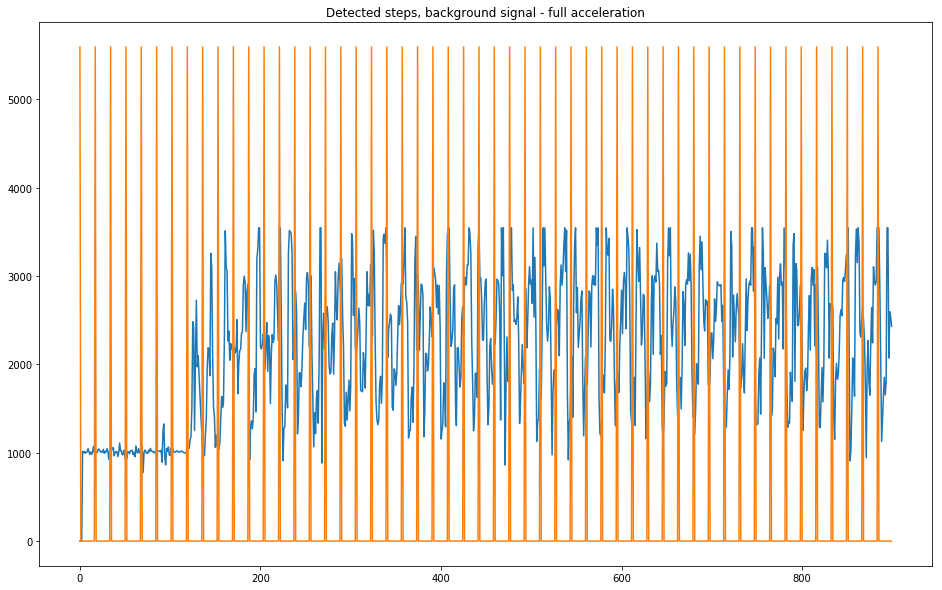

In [54]:
steps_signal = np.zeros((diff_z_and_full.size),dtype=float)
step_size = int(measurements_per_second/step_frequency)
print(step_size)
for i in range(0,steps_signal.size,step_size):
    steps_signal[i]=max(diff_z_and_full)
plt.plot(acc_full)
plt.plot(steps_signal)
plt.title("Detected steps, background signal - full acceleration")
plt.show()